In [2077]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2078]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder,OrdinalEncoder
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2079]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [2080]:
df.shape

(51717, 17)

In [2081]:
# There are 51,717 records are 17 columns for the given data set.

In [2082]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [2083]:
# Here some variable are presents in object dtype so we have to change in numerical values. for example rate,
# votes,etc are need to change in numerical.

# Change datatype if required :

In [2084]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [2085]:
def change_dtype_1(x):
    if type(x)==str:
        if len(x)>3:
            return float(x[:3])
        else:
            return 0
    else:
        return x

In [2086]:
df["rate"] = df["rate"].map(change_dtype_1)

In [2087]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [2088]:
def change_dtype_2(x):
    if type(x)==str:
        if len(x)==3:
            return float(x)
        else:
            return float(x.replace(',',''))
    else:
        return x

In [2089]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].map(change_dtype_2)

In [2090]:
# from the given data set some columns are are not impactfull to target variable.so we drop that columns

In [2091]:
df.drop(["url","address","phone","dish_liked","reviews_list","menu_item"],axis=1,inplace=True)

In [2092]:
df.columns = ['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost',
       'listed_in(type)', 'listed_in(city)']

In [2093]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [2094]:
df.shape

(51717, 11)

In [2095]:
# Now we have 51,717 records with 11 columns

# 5 point summary:

In [2096]:
df.describe()  # for numeric

,rate,votes,approx_cost
count,43942.000000,51717.000000,51371.000000
mean,3.508698,283.697527,555.431566
std,0.925639,803.838853,438.850728
min,0.000000,0.000000,40.000000
25%,3.300000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [2097]:
# Here the maximum in approx_cost columns is 6000 and min is 40 and 75% of the data is below 650 and mean s 555.50.


In [2098]:
df.describe(include=np.object) # for catogorical

,name,online_order,book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
count,51717,51717,51717,51696,51490,51672,51717,51717
unique,8792,2,2,93,93,2723,7,30
top,Cafe Coffee Day,Yes,No,BTM,Quick Bites,North Indian,Delivery,BTM
freq,96,30444,45268,5124,19132,2913,25942,3279


# Univariate Analysis:

In [2099]:
# Numeric:

In [2100]:
num_cols = df.select_dtypes(np.number).columns
num_cols

Index(['rate', 'votes', 'approx_cost'], dtype='object')

skeness of rate = -2.714137103432399
kurtosis of rate = 7.874221999188138


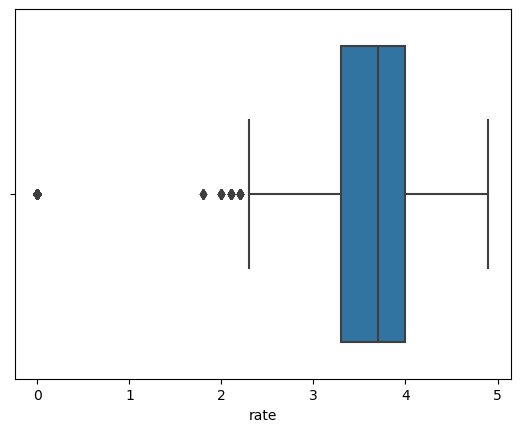

skeness of votes = 7.547819350060049
kurtosis of votes = 88.8667383335981


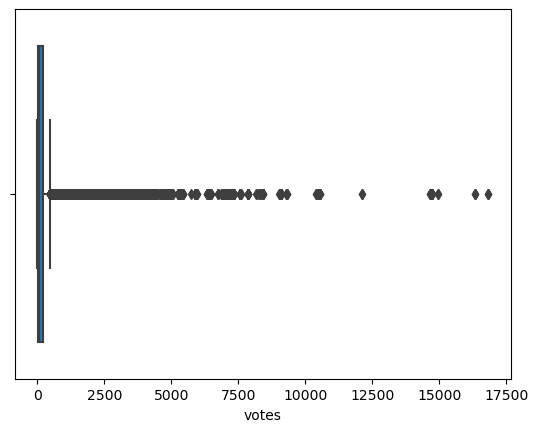

skeness of approx_cost = 2.6019834564289535
kurtosis of approx_cost = 10.449886184618375


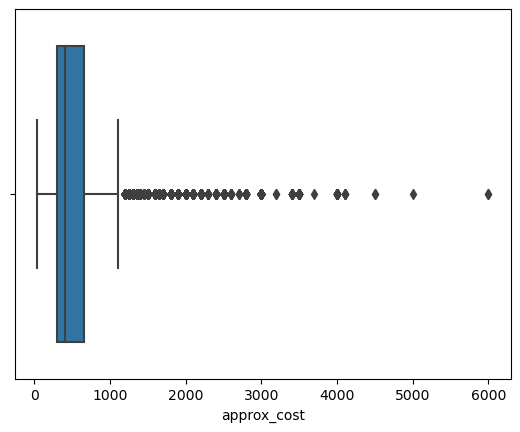

In [2101]:
for i in num_cols:
    sns.boxplot(df[i])
    print(f"skeness of {i} = {df[i].skew()}")
    print(f"kurtosis of {i} = {df[i].kurt()}")
    plt.show()

In [2102]:
# most of the customers given the rate between 3 to 4.

In [2103]:
# In the votes columns, customers are not giveing the vote but some perticular hotels which have large number of votes

In [2104]:
# For approx_cost are positive skew which shows that the most of the hotels have less that 1000 approx for two people.

In [2105]:
# for catogorical :
cat_cols = df.select_dtypes(np.object).columns
cat_cols

Index(['name', 'online_order', 'book_table', 'location', 'rest_type',
       'cuisines', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

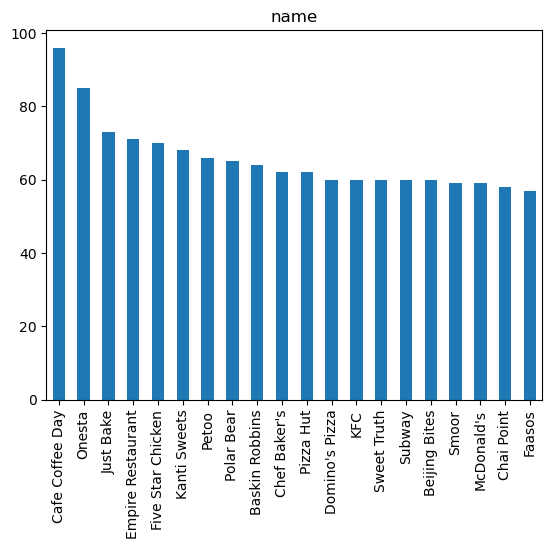

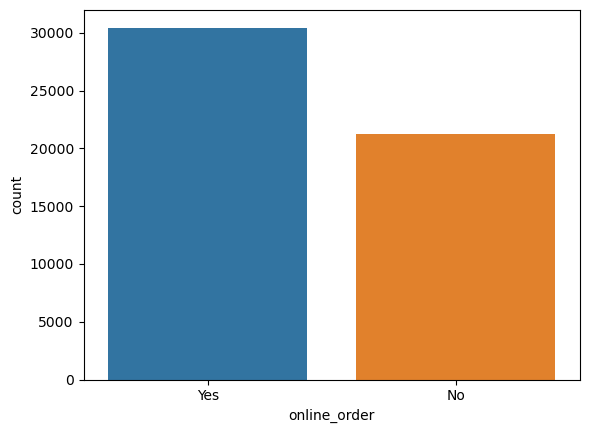

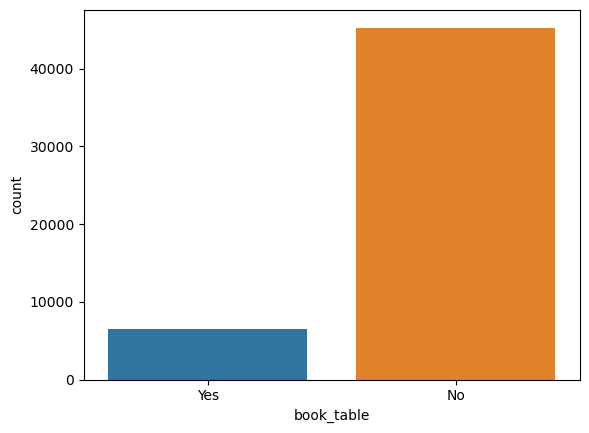

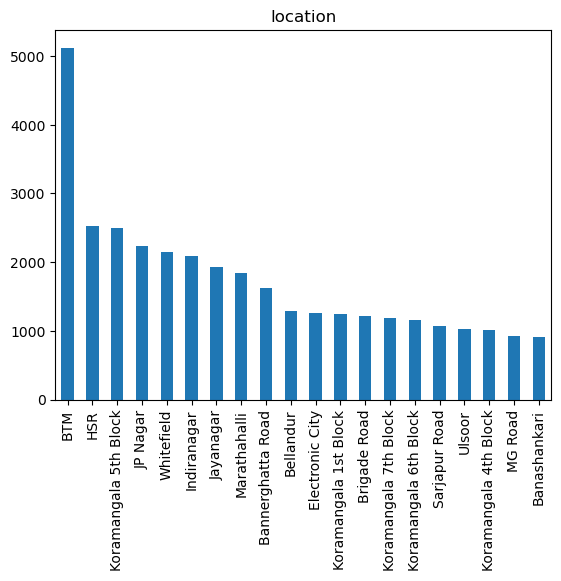

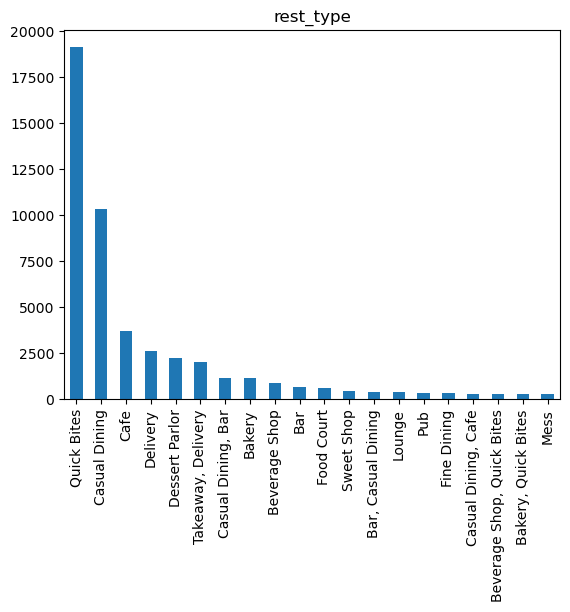

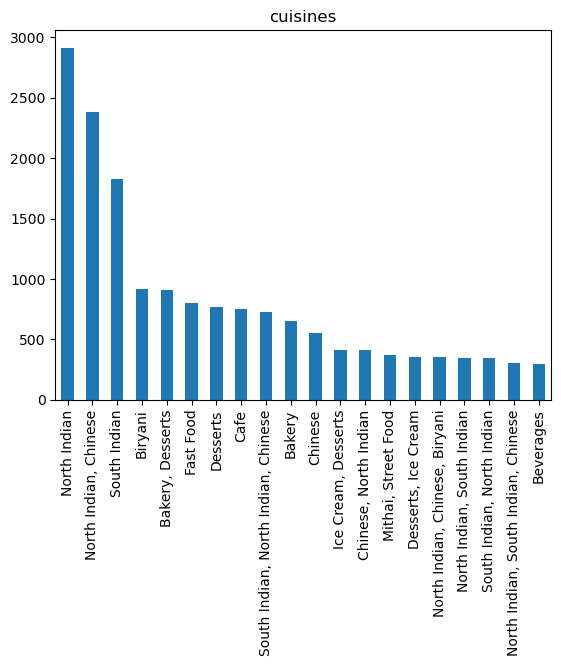

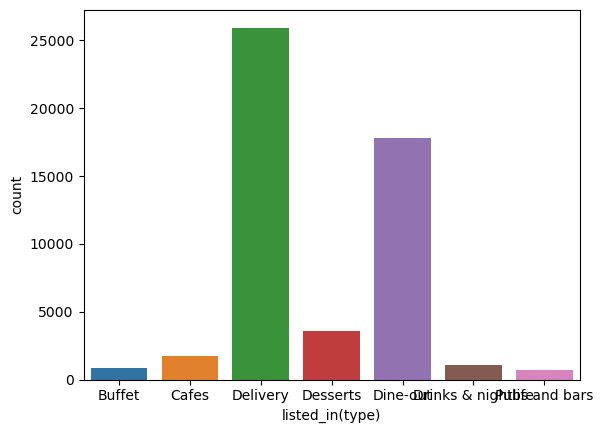

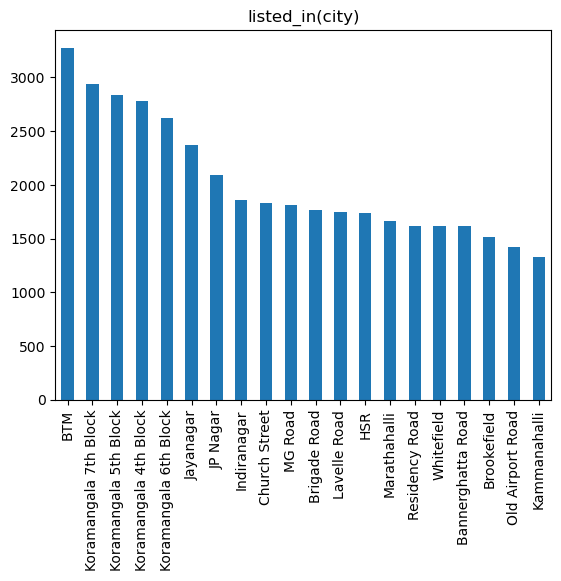

In [2106]:
for i in cat_cols:
        if df[i].nunique()<10:
            sns.countplot(df[i])
            plt.show()
        else:
            df[i].value_counts().head(20).plot(kind='bar')
            plt.title(i)
            plt.show()
            
  

In [2107]:
# Cafe Coeffe Day,Onesta,Just Bake have large chain in banglore as compare to others.

In [2108]:
# Online order are large as compare to offline and just due to that on book_table columns most of the people not book 
# table and due to that Delivery is large in listed_type as compare to others.
# Because the cutomers like to eat by using app for online ordering.

In [2109]:
# In BTM area, there are large number of hotels as compared to others.

In [2110]:
# In Overall city, Most of the  resto type are Quick Bites as compared to others.

In [2111]:
df_num = df.select_dtypes(np.number).columns
df_num

Index(['rate', 'votes', 'approx_cost'], dtype='object')

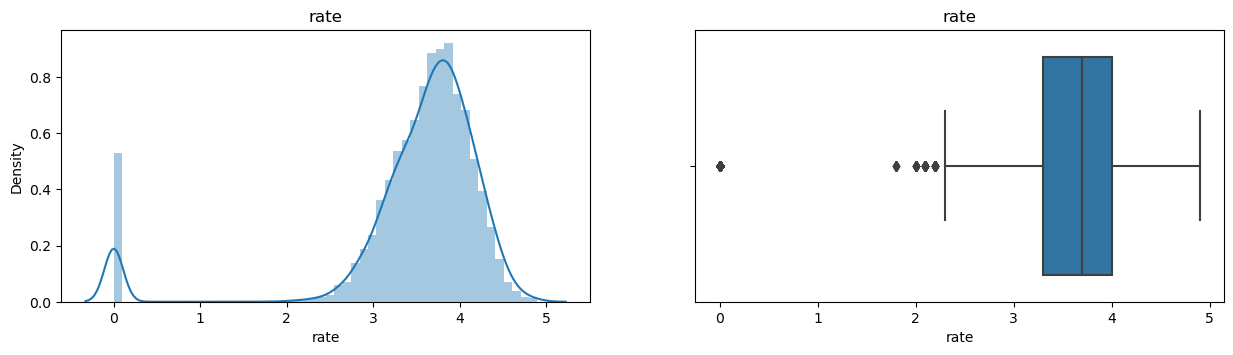

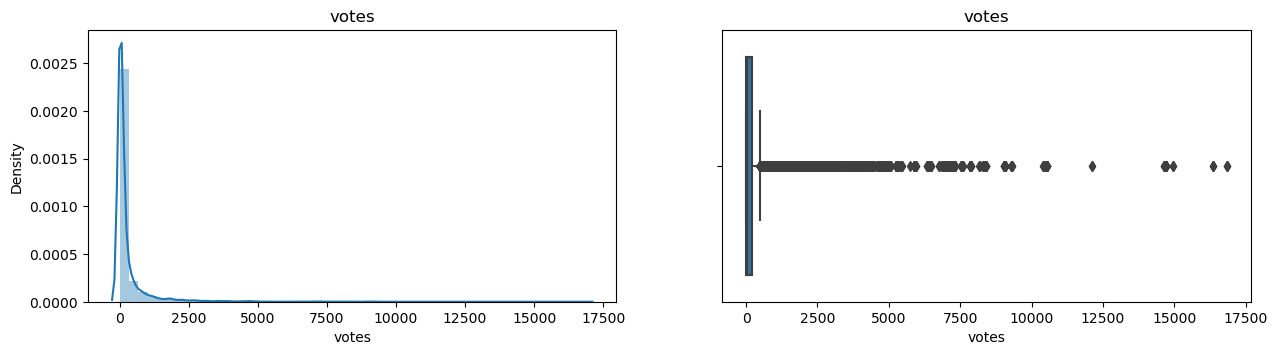

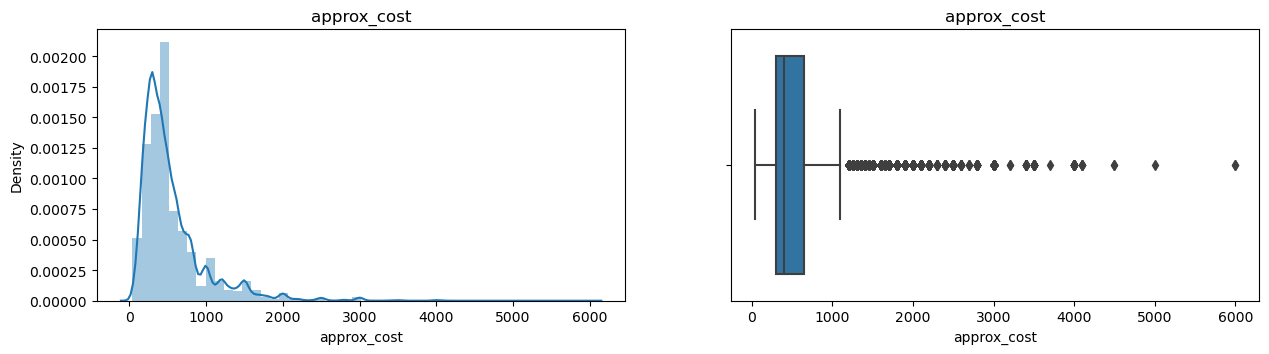

In [2112]:

row = 3
col = 2
count=1
for i in df_num:
    plt.figure(figsize=(15,12))
    plt.subplot(row,col,count)
    sns.distplot(df[i])
    plt.title(i)
    count+=1
    plt.subplot(row,col,count)
    sns.boxplot(df[i])
    plt.title(i)
    count+=1
    plt.show()

# Bi-Variate Analysis: 


In [2113]:
# Categorical vs Categorical:

In [2114]:
top_cats_name = df['name'].value_counts().head(10).index

In [2115]:
df_top_cats_name = df[df['name'].isin(top_cats_name)] 

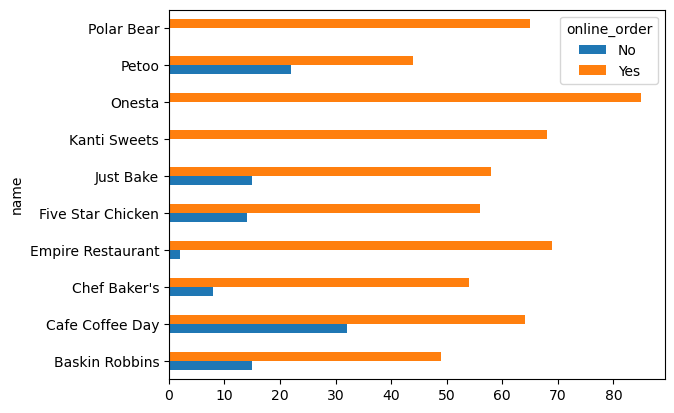

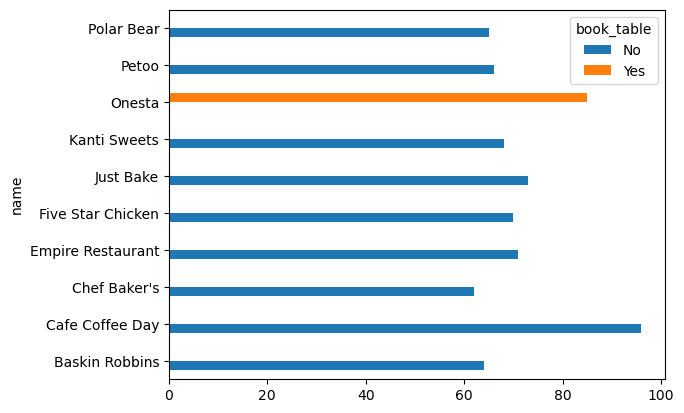

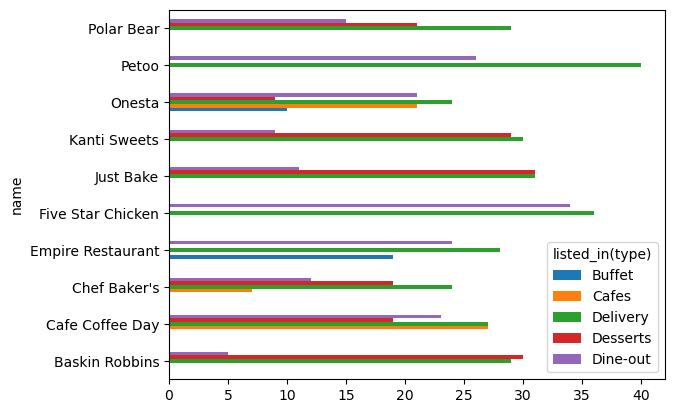

In [2116]:
for i in ['online_order','book_table','listed_in(type)']:
        pd.crosstab(df_top_cats_name['name'],df[i]).plot(kind='barh')

In [2117]:
# Top 20 reto which have large number of chain in city in which we obeserved that most of the hotel cutomers preffer for 
# online insted of dine_in.

In [2118]:
# The hotels which have large number of outlets, customers not prefered to book the table. 

In [2119]:
top_cats_city = df['listed_in(city)'].value_counts().head(10).index

In [2120]:
df_top_cats_city = df[df['listed_in(city)'].isin(top_cats_city)] 

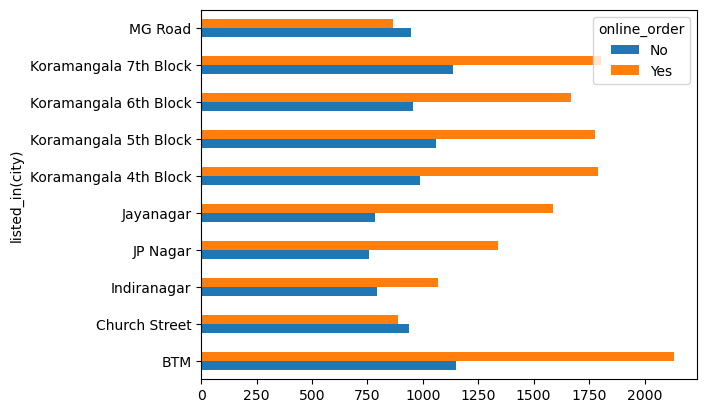

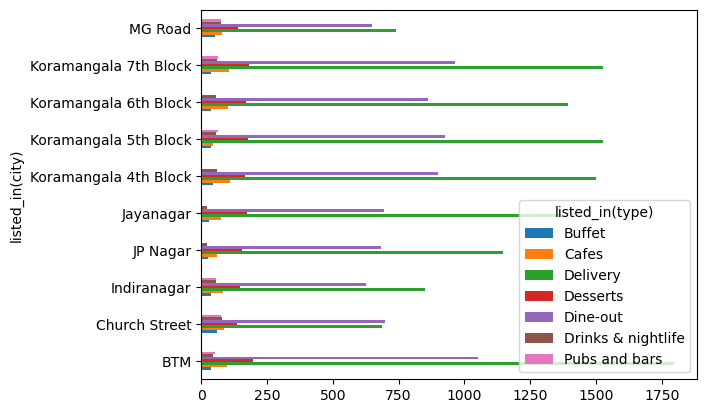

In [2121]:
for i in ['online_order','listed_in(type)']:
        pd.crosstab(df_top_cats_city['listed_in(city)'],df[i]).plot(kind='barh')

In [2122]:
# Mostly cutomers are prefered BTM area hotels and mostly ordered online

In [2123]:
top_cats_cuisines = df['cuisines'].value_counts().head(10).index

In [2124]:
df_top_cats_cuisines = df[df['cuisines'].isin(top_cats_cuisines)] 

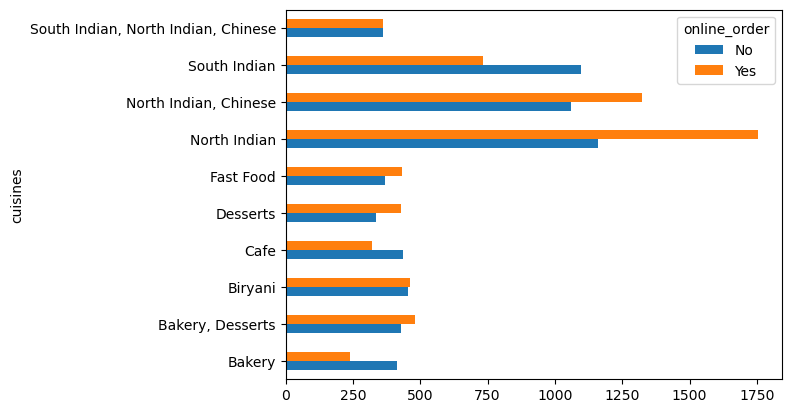

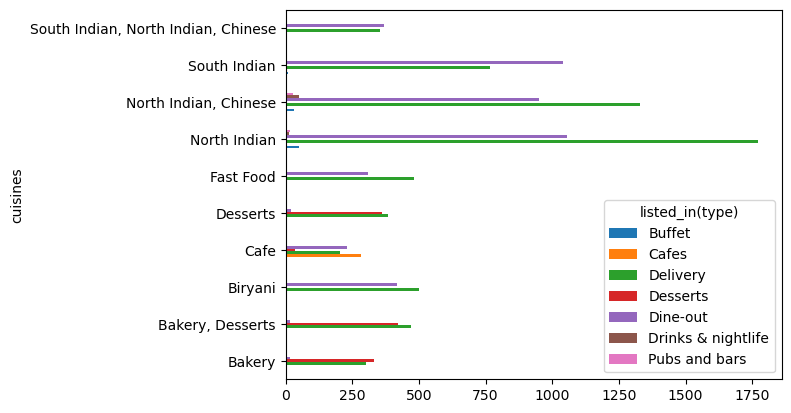

In [2125]:
for i in ['online_order','listed_in(type)']:
        pd.crosstab(df_top_cats_cuisines['cuisines'],df[i]).plot(kind='barh')

In [2126]:
# cutomers prefered online as well as offline in approx equal ratio for top 10 cuisines.

In [2127]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [2128]:
# Categorical vs numerical:

<AxesSubplot:xlabel='online_order', ylabel='approx_cost'>

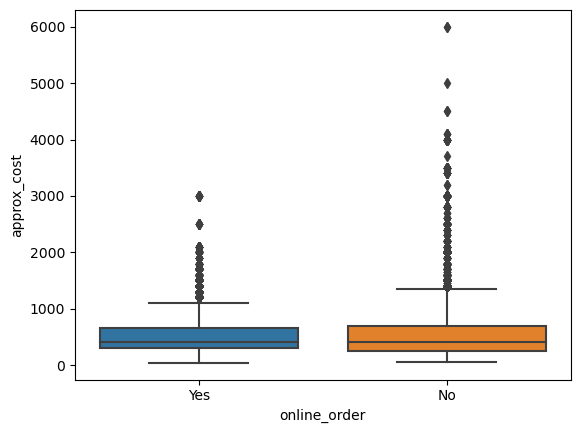

In [2129]:
sns.boxplot(data=df,x='online_order',y ='approx_cost')

<AxesSubplot:xlabel='book_table', ylabel='approx_cost'>

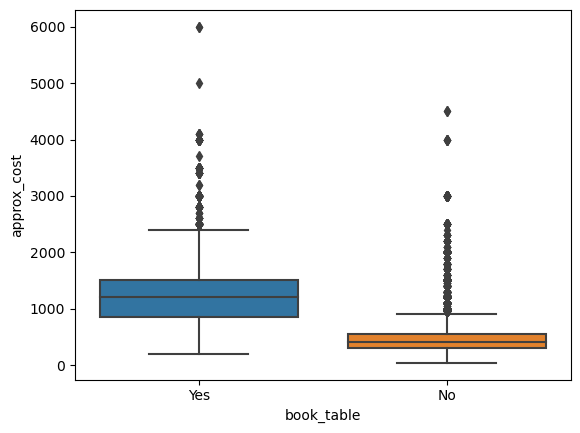

In [2130]:
sns.boxplot(data=df,x='book_table',y ='approx_cost')

<AxesSubplot:xlabel='listed_in(city)', ylabel='approx_cost'>

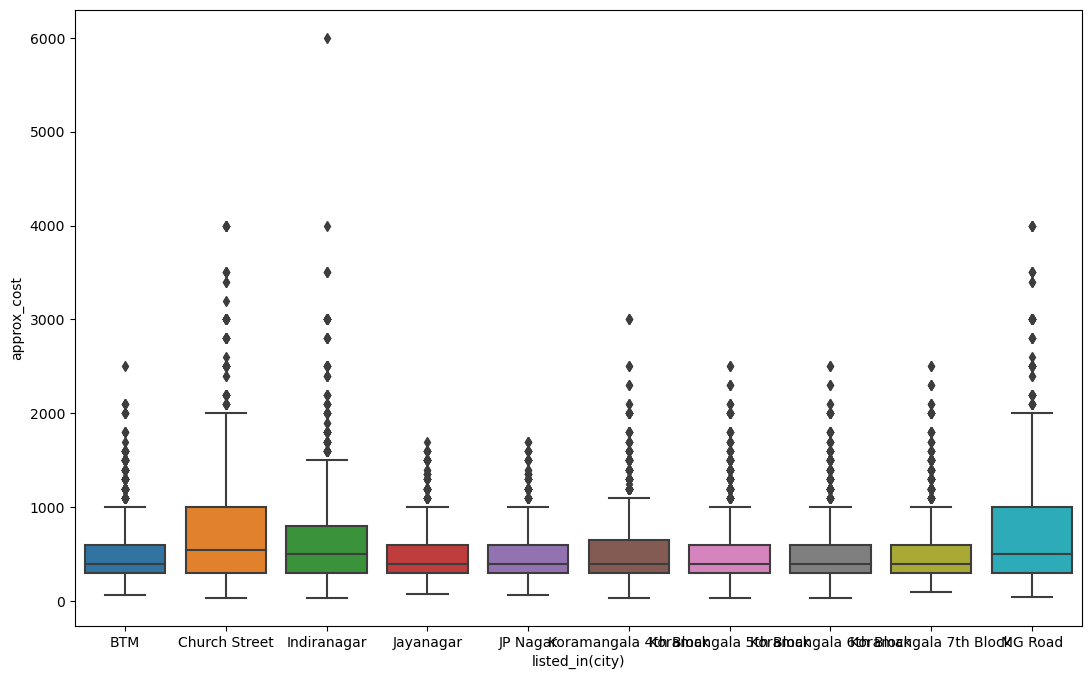

In [2131]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df_top_cats_city,x='listed_in(city)',y='approx_cost')

In [2132]:
# Here city wise top 10 cities which have maximum numer of hotels and they have same approsimate equal number of rate 
# for two people.

In [2133]:
# Numerical vs numeircal :


<AxesSubplot:>

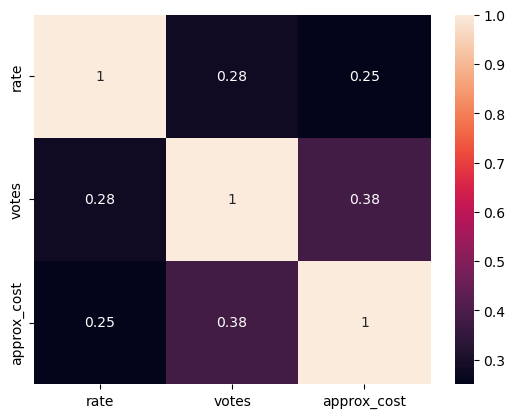

In [2134]:
sns.heatmap(df.corr(),annot=True)

# Multivariable Analysis :

In [2135]:
# For num vs num vs cat:

<AxesSubplot:xlabel='approx_cost', ylabel='votes'>

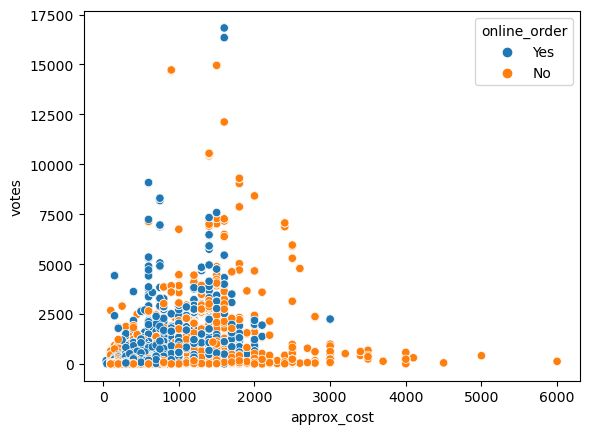

In [2136]:
sns.scatterplot(x = df['approx_cost'],y =df['votes'],hue=df['online_order'])

In [2137]:
# mostly two people approximate cost is greater than 2000 then it mostly not online and below 2000 there are overlapping
# of online order and offline 

<AxesSubplot:xlabel='approx_cost', ylabel='votes'>

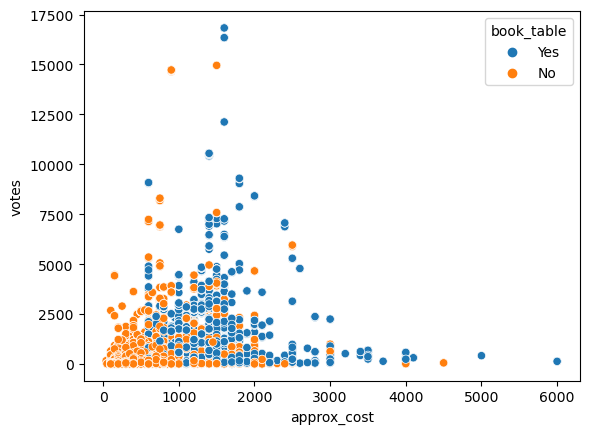

In [2138]:
sns.scatterplot(x = df['approx_cost'],y =df['votes'],hue=df['book_table'])

In [2139]:
# aprrox_cost is greater than 3000 then customers are booking the table and less than 3000 customers bevaiour is 
# mix

# Imputing missing value :

In [2140]:
# Check whether duplicates rows in the given data set.

In [2141]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [2142]:
pd.DataFrame((df.isnull().sum()/len(df)*100),columns=['missing %'])

,missing %
name,0.000000
online_order,0.000000
book_table,0.000000
rate,15.026449
votes,0.000000
location,0.040691
rest_type,0.439846
cuisines,0.087194
approx_cost,0.666550
listed_in(type),0.000000


In [2143]:
# for column Location :

# Here we are planning to do impute the location of the hotel based on the name.If there is no location for a 
# resturant we impute that with the location which is having minimal outlet in the area or location.

In [2144]:
gb1 = df.groupby('name')['location'].value_counts().sort_values(ascending=False)
d1 = {}
for i in gb1.index:
    d1.update({i[0]:i[1]})

In [2145]:
d1

{'Hammered': 'New BEL Road',
 'Dolci Desserts': 'Cunningham Road',
 'The Chocolate Heaven': 'Whitefield',
 'Tiger Trail - Ramada Hotel': 'Shivajinagar',
 'ThrowBack - Pub & Dine': 'Langford Town',
 'Berrylicious Cafe': 'MG Road',
 'Hatti Punjab Di': 'Electronic City',
 'Chillout': 'Electronic City',
 'Fresh Pressery Cafe': 'Lavelle Road',
 'Bonsouth': 'Koramangala 5th Block',
 'The Lobby Brew - Conrad Bengaluru': 'Ulsoor',
 "Smally's Resto Cafe": 'HSR',
 'Maxpresso': 'Koramangala 7th Block',
 'Tangerine - Davanam Sarovar Portico Suites': 'Koramangala 2nd Block',
 'Cilantro': 'Koramangala 4th Block',
 'Stoner': 'Indiranagar',
 'Green Theory': 'Residency Road',
 'Bistro Claytopia': 'Koramangala 1st Block',
 'Roundup Cafe': 'Koramangala 5th Block',
 'Lot Like Crepes': 'Koramangala 7th Block',
 'Smoor': 'Bellandur',
 'Cafe @ Elanza': 'Richmond Road',
 'Oh! Calcutta': 'Church Street',
 'Lakeview Milkbar': 'Kalyan Nagar',
 'Carnival de Goa': 'Ulsoor',
 'Happy Belly Bakes': 'Frazer Town',
 'M

In [2146]:
for index,rows in df.iterrows():
    if pd.isna(rows['location']):
        for key,value in d1.items():
            if rows['name'] in key:
                df.at[index,'location']=value

In [2147]:
df.dropna(axis=0,thresh=7,inplace=True)

In [2148]:
df.reset_index(drop=True,inplace=True)

In [2149]:
df.shape

(51603, 11)

In [2150]:
df.isnull().sum()

name                  0
online_order          0
book_table            0
rate               7749
votes                 0
location              0
rest_type           221
cuisines             39
approx_cost         338
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [1570]:
#  Imputation for cuisines :

In [1571]:
# This we impute by using the hotel name information so we impute by hotel name wise

In [1572]:
gb2 = df.groupby('name')['cuisines'].value_counts()
d2 = {}
for i in gb2.index:
    d2.update({i[0]:i[1]})

In [1573]:
for index,rows in df.iterrows():
    if pd.isna(rows['cuisines']):
        for key,value in d2.items():
            if rows['name'] in key:
                df.at[index,'cuisines']=value

In [1574]:
df.isnull().sum()

name                  0
online_order          0
book_table            0
rate               7749
votes                 0
location              0
rest_type           221
cuisines              6
approx_cost         338
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [1575]:
# There are 6 records are not impute in cuisines due to no information of hotels name and there 
# cuisines we are impute by there mode

In [1576]:
df['cuisines']=df['cuisines'].fillna(df['cuisines'].mode()[0])

In [1577]:
df.isnull().sum()

name                  0
online_order          0
book_table            0
rate               7749
votes                 0
location              0
rest_type           221
cuisines              0
approx_cost         338
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [1578]:
#  Imputation for rest_type :

In [1579]:
# This we impute by using the hotel name information so we impute by hotel name wise

In [1580]:
gb3 = df.groupby('name')['rest_type'].value_counts()
d3 = {}
for i in gb3.index:
    d3.update({i[0]:i[1]})

In [1581]:
for index,rows in df.iterrows():
    if pd.isna(rows['rest_type']):
        for key,value in d3.items():
            if rows['name'] in key:
                df.at[index,'rest_type']=value

In [1582]:
df.isnull().sum()

name                  0
online_order          0
book_table            0
rate               7749
votes                 0
location              0
rest_type           110
cuisines              0
approx_cost         338
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [1424]:
# for many hotels name we don't have information for rest_type so we impute by using  cuisines information

In [1583]:
gb4 = df.groupby('cuisines')['rest_type'].value_counts()
d4 = {}
for i in gb4.index:
    d4.update({i[0]:i[1]})

In [1584]:
for index,rows in df.iterrows():
    if pd.isna(rows['rest_type']):
        for key,value in d4.items():
            if rows['cuisines'] in key:
                df.at[index,'rest_type']=value

In [1585]:
df.isnull().sum()

name                  0
online_order          0
book_table            0
rate               7749
votes                 0
location              0
rest_type            19
cuisines              0
approx_cost         338
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [1586]:
# remaining 19 we impute by mode of rest_type 

In [1587]:
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])

In [1588]:
df.isnull().sum()

name                  0
online_order          0
book_table            0
rate               7749
votes                 0
location              0
rest_type             0
cuisines              0
approx_cost         338
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [1589]:
# for approx_cost:

In [1590]:
# Here we are planning to impute the approx_cost(for two people) based on the 
# location and listed_in(type) with median value

In [1591]:
grouped_data = df.groupby(['location', 'listed_in(type)'])

def impute_median_approx_cost(group):
    group['approx_cost'] = group['approx_cost'].fillna(group['approx_cost'].median())
    return group

In [1592]:
df = grouped_data.apply(impute_median_approx_cost)

In [1593]:
df.isnull().sum()

name                  0
online_order          0
book_table            0
rate               7749
votes                 0
location              0
rest_type             0
cuisines              0
approx_cost           0
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [1594]:
gb5= df.groupby('name')['rate'].value_counts()
d5 = {}
for i in gb5.index:
    d5.update({i[0]:i[1]})

In [1595]:
for index,rows in df.iterrows():
    if pd.isna(rows['rate']):
        for key,value in d5.items():
            if rows['name'] in key:
                df.at[index,'rate']=value

In [1596]:
df.isnull().sum()

name                  0
online_order          0
book_table            0
rate               5115
votes                 0
location              0
rest_type             0
cuisines              0
approx_cost           0
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [1439]:
# Most of the customers are not giving the rating so we impute name wise but some hotels are there which don't have 
# any rating which means if the hotels are too good then it will be high chance that cutomers give the rating but 
# this hotels have no rating so we fill with 0.

In [1765]:
df_fill0 = df.copy()

In [1766]:
df_fill0['rate']=df_fill0['rate'].fillna(df_fill0['rate'].median())

In [1767]:
df_impute = df_fill0.copy()

In [1768]:
df_impute.isnull().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
listed_in(type)    0
listed_in(city)    0
dtype: int64

### Outlier Treatment

In [1769]:
def remove_outliers(df):
    # Calculate the mean and standard deviation for each location, listed_in_type and approximate cost for two people
    group =df.groupby(['location', 'listed_in(type)'])['approx_cost']
    mean = group.transform('mean')
    std = group.transform('std')

    # Calculate the upper and lower bounds for outliers
    lower_bound = mean - std
    upper_bound = mean + std

    # Remove the outliers
    df_new = df[(df['approx_cost'] >= lower_bound) & (df['approx_cost'] <= upper_bound)]
    return df_new

# Remove the outliers
df_clean = remove_outliers(df_impute)

In [1770]:
df_clean.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,Banashankari


In [1771]:
df_clean.shape

(38857, 11)

In [1772]:
# after removing the outliers we are with 38,857 records and 11 columns.

In [1773]:
# d9 is dict which we just find so that we can check which location and which resto type 
# have the "approx_cost" values without droping them.

In [1774]:
a = df_impute.groupby(['location','listed_in(type)'])['approx_cost']
b = pd.DataFrame(a)

In [1775]:
d9 = {}
for i in b.index:
    d9.update({b[0][i]:b[1][i].values})

In [1776]:
df_clean.describe()

,rate,votes,approx_cost
count,38857.000000,38857.000000,38857.000000
mean,3.428492,220.349101,481.819363
std,0.969086,664.666421,293.641147
min,0.000000,0.000000,100.000000
25%,3.300000,6.000000,300.000000
50%,3.700000,36.000000,400.000000
75%,3.900000,159.000000,600.000000
max,4.900000,16832.000000,3400.000000


In [1777]:
#In the Column approximate_cost(for two people) more outliers are there to remove that we get the location wise 
# based on the type of the restaurent we took the aproximate cost between the 1 standard deviation.

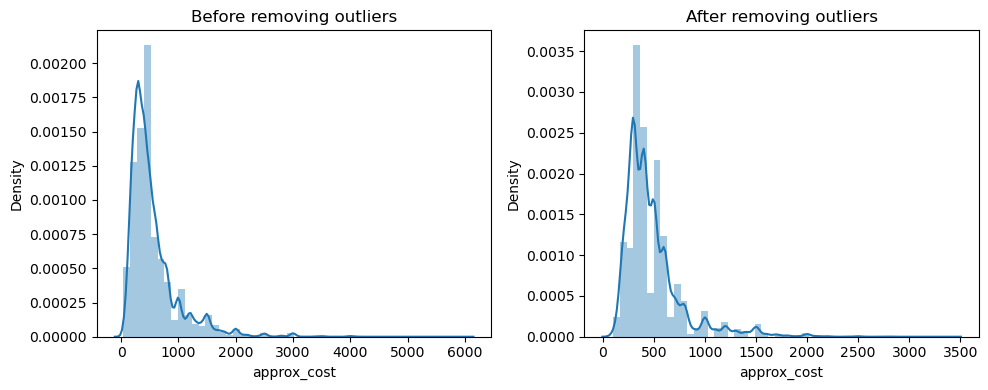

In [1778]:
row=1
col=2
iterator = 1
plt.figure(figsize=(10,4))
plt.subplot(row,col,iterator)
sns.distplot(df['approx_cost'])
plt.title("Before removing outliers")
iterator+=1
plt.subplot(row,col,iterator)
sns.distplot(df_clean['approx_cost'])
plt.title("After removing outliers")
plt.tight_layout()
plt.show()

# Encoding :

In [1779]:
# for name:
# In the name columns, there are more differents hotels name which are 7409 so we not able to do dummy coding 
# so we will use the target encoding.
# we calculate the overall average price per hotel name in 

In [1780]:
dict1=df_clean.groupby('name')['approx_cost'].median().to_dict()

df_clean['overall_avg_price'] = df_clean['name'].map(dict1)

In [1781]:
df_clean.drop('name',axis=1,inplace=True)

In [1782]:
# for"online_order" and "book_table" :

In [1783]:
# The "online_order" and "book_table" have only two different type so we go for dummy encoding 

In [1784]:
# for online_order:

In [1785]:
df_clean['online_order'] = pd.get_dummies(df_clean['online_order'],drop_first=True)


In [1786]:
df_clean.rename(columns={'online_order':'online_order(yes)'},inplace=True)

In [1787]:
# For book_table":

In [1788]:
df_clean['book_table'] = pd.get_dummies(df_clean['book_table'],drop_first=True)

In [1789]:
df_clean.rename(columns={'book_table':'book_table(yes)'},inplace=True)

In [1790]:
df_clean.head()

,online_order(yes),book_table(yes),rate,votes,location,rest_type,cuisines,approx_cost,listed_in(type),listed_in(city),overall_avg_price
0,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,800.0
1,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,800.0
2,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,800.0
4,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,600.0
5,1,0,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,Banashankari,600.0


In [1791]:
# For Location  and cuisines :

In [1792]:
# For both the columns we do the frequency encoding and before that by using values counts some location
# are repeated more times the location are less than 250 we put in others and remianing as it is 
# same type of logic we used for cuisines.

In [1793]:
others = df_clean['location'].value_counts()[df_clean['location'].value_counts()< 250]

In [1794]:
df_clean['location'] = df_clean['location'].map(lambda x : 'others' if x in others else x)

In [1795]:
dict2 = df_clean['location'].value_counts(normalize=True).to_dict()

df_clean['location'] = df_clean['location'].map(dict2)

In [1796]:
# For cuisines:

In [1797]:
others2 = df_clean['cuisines'].value_counts()[df_clean['cuisines'].value_counts()<100]

In [1798]:
df_clean['cuisines'] = df_clean['cuisines'].map(lambda x : 'others' if x in others2 else x)

In [1799]:
dict3 = df_clean['cuisines'].value_counts(normalize=True).to_dict()

df_clean['cuisines'] = df_clean['cuisines'].map(dict3)

In [1800]:
# For listed_in(type):

<AxesSubplot:xlabel='listed_in(type)', ylabel='approx_cost'>

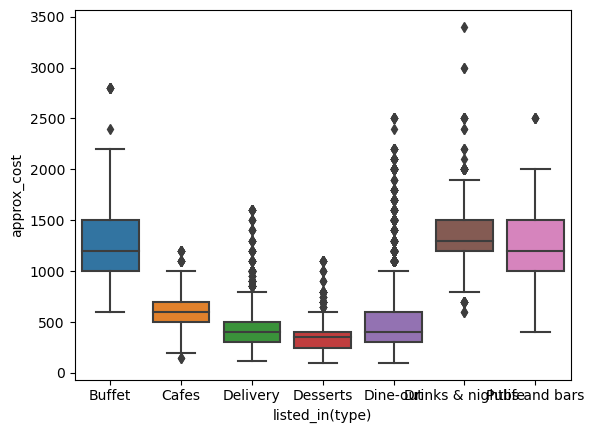

In [1801]:
sns.boxplot(data = df_clean,x = 'listed_in(type)',y = 'approx_cost')

In [1802]:
a_val= df.groupby('listed_in(type)')['approx_cost'].mean().sort_values()
b_list = list(a_val.index)

In [1803]:
# for "listed_in(type)" we are going for orindinal encoding because if we check there mean for each catogory
# it is decreasing manner with target variable.

In [1804]:
od = OrdinalEncoder(categories=[b_list])

In [1805]:
df_clean['listed_in(type)']= od.fit_transform(df_clean[['listed_in(type)']])

In [1806]:
# For rest_type : 

In [1807]:
# We can do the frequnecy encoding and the resto type which are less than 100 we put inside the 

In [1808]:
others3 = df_clean['rest_type'].value_counts()[df_clean['rest_type'].value_counts()<100]

In [1809]:
df_clean['rest_type'] = df_clean['rest_type'].map(lambda x : 'others' if x in others3 else x)

In [1810]:
dict4 = df_clean['rest_type'].value_counts(normalize=True).to_dict()

df_clean['rest_type'] = df_clean['rest_type'].map(dict4)

In [1811]:
# For listed_in(city) : 

In [1812]:
# We can do frequency encoding:

In [1813]:
dict5 = df_clean['listed_in(city)'].value_counts(normalize=True).to_dict()

df_clean['listed_in(city)'] = df_clean['listed_in(city)'].map(dict5)

In [1814]:
df_clean

,online_order(yes),book_table(yes),rate,votes,location,rest_type,cuisines,approx_cost,listed_in(type),listed_in(city),overall_avg_price
0,1,1,4.1,775,0.016522,0.174743,0.508557,800.0,4.0,0.016162,800.0
1,1,0,4.1,787,0.016522,0.174743,0.508557,800.0,4.0,0.016162,800.0
2,1,0,3.8,918,0.016522,0.002702,0.508557,800.0,4.0,0.016162,800.0
4,0,0,3.8,166,0.013228,0.174743,0.508557,600.0,4.0,0.016162,600.0
5,1,0,3.8,286,0.013228,0.174743,0.060247,600.0,4.0,0.016162,600.0
...,...,...,...,...,...,...,...,...,...,...,...
51592,0,0,3.7,27,0.045963,0.004993,0.508557,1200.0,5.0,0.034331,1200.0
51594,0,0,2.8,161,0.045963,0.014798,0.508557,1200.0,5.0,0.034331,1200.0
51598,0,0,3.6,27,0.045963,0.008621,0.003551,1500.0,5.0,0.034331,1500.0
51601,0,1,4.3,236,0.093754,0.008621,0.003732,2500.0,5.0,0.034331,2500.0


In [1815]:
df_final = df_clean.copy()

In [1816]:
df_final

,online_order(yes),book_table(yes),rate,votes,location,rest_type,cuisines,approx_cost,listed_in(type),listed_in(city),overall_avg_price
0,1,1,4.1,775,0.016522,0.174743,0.508557,800.0,4.0,0.016162,800.0
1,1,0,4.1,787,0.016522,0.174743,0.508557,800.0,4.0,0.016162,800.0
2,1,0,3.8,918,0.016522,0.002702,0.508557,800.0,4.0,0.016162,800.0
4,0,0,3.8,166,0.013228,0.174743,0.508557,600.0,4.0,0.016162,600.0
5,1,0,3.8,286,0.013228,0.174743,0.060247,600.0,4.0,0.016162,600.0
...,...,...,...,...,...,...,...,...,...,...,...
51592,0,0,3.7,27,0.045963,0.004993,0.508557,1200.0,5.0,0.034331,1200.0
51594,0,0,2.8,161,0.045963,0.014798,0.508557,1200.0,5.0,0.034331,1200.0
51598,0,0,3.6,27,0.045963,0.008621,0.003551,1500.0,5.0,0.034331,1500.0
51601,0,1,4.3,236,0.093754,0.008621,0.003732,2500.0,5.0,0.034331,2500.0


In [1817]:
x = df_final.drop(['approx_cost','listed_in(city)'],axis=1)
y = df_final['approx_cost']

In [1818]:
Xc = sm.add_constant(x)
Xc

,const,online_order(yes),book_table(yes),rate,votes,location,rest_type,cuisines,listed_in(type),overall_avg_price
0,1.0,1,1,4.1,775,0.016522,0.174743,0.508557,4.0,800.0
1,1.0,1,0,4.1,787,0.016522,0.174743,0.508557,4.0,800.0
2,1.0,1,0,3.8,918,0.016522,0.002702,0.508557,4.0,800.0
4,1.0,0,0,3.8,166,0.013228,0.174743,0.508557,4.0,600.0
5,1.0,1,0,3.8,286,0.013228,0.174743,0.060247,4.0,600.0
...,...,...,...,...,...,...,...,...,...,...
51592,1.0,0,0,3.7,27,0.045963,0.004993,0.508557,5.0,1200.0
51594,1.0,0,0,2.8,161,0.045963,0.014798,0.508557,5.0,1200.0
51598,1.0,0,0,3.6,27,0.045963,0.008621,0.003551,5.0,1500.0
51601,1.0,0,1,4.3,236,0.093754,0.008621,0.003732,5.0,2500.0


In [1819]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            approx_cost   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.693e+05
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:52:00   Log-Likelihood:            -2.0416e+05
No. Observations:               38857   AIC:                         4.083e+05
Df Residuals:                   38847   BIC:                         4.084e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3199      1.194      6.128      0.000       4.979       9.661
online_order(yes)     0.5506      0.494      1.114      0.265      -0.418       1.519
book_table(yes)      13.3521      1.124     11.883      0.000      11.150      15.554
rate                  0.4738      0.253      1.869      0.062      -0.023       0.971
votes                 0.0019      0.000      4.873      0.000       0.001       0.003
location            -18.8702      7.641     -2.469      0.014     -33.847      -3.893
rest_type           -15.9416      1.495    -10.662      0.000     -18.872     -13.011
cuisines              2.9946      1.004      2.982      0.003       1.026       4.963
listed_in(type)       5.4255      0.290     18.700      0.000       4.857       5.994
overall_avg_price     0.9670      0.001    790.847      0.000       0.965       0.969
==============================================================================
Omnibus:                    19092.861   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         54013499.312
Skew:                          -0.635   Prob(JB):                         0.00
Kurtosis:                     185.647   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1820]:
num_cols = ['overall_avg_price','rate','votes','cuisines']
ss= StandardScaler()

Xc[num_cols] = ss.fit_transform(Xc[num_cols])


In [1821]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            approx_cost   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.693e+05
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:52:00   Log-Likelihood:            -2.0416e+05
No. Observations:               38857   AIC:                         4.083e+05
Df Residuals:                   38847   BIC:                         4.084e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               476.3537      0.716    665.548      0.000     474.951     477.757
online_order(yes)     0.5506      0.494      1.114      0.265      -0.418       1.519
book_table(yes)      13.3521      1.124     11.883      0.000      11.150      15.554
rate                  0.4591      0.246      1.869      0.062      -0.022       0.941
votes                 1.2872      0.264      4.873      0.000       0.769       1.805
location            -18.8702      7.641     -2.469      0.014     -33.847      -3.893
rest_type           -15.9416      1.495    -10.662      0.000     -18.872     -13.011
cuisines              0.7306      0.245      2.982      0.003       0.250       1.211
listed_in(type)       5.4255      0.290     18.700      0.000       4.857       5.994
overall_avg_price   282.7006      0.357    790.847      0.000     282.000     283.401
==============================================================================
Omnibus:                    19092.861   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         54013499.312
Skew:                          -0.635   Prob(JB):                         0.00
Kurtosis:                     185.647   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1822]:
cols = list(Xc.columns)

while len(cols)>1:
    Xc= Xc[cols]
    model = sm.OLS(y, Xc).fit()
    p= model.pvalues
    pmax = max(p)
    pid = p.idxmax()
    if (pmax > 0.05) and (pid != 'const'):
        cols.remove(pid)
        print("Variable removed: ", pid,"P-value: ",pmax)
    else:
        break

cols

Variable removed:  online_order(yes) P-value:  0.26526225603925335


['const',
 'book_table(yes)',
 'rate',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'listed_in(type)',
 'overall_avg_price']

In [1823]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            approx_cost   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.904e+05
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:53:26   Log-Likelihood:            -2.0416e+05
No. Observations:               38857   AIC:                         4.083e+05
Df Residuals:                   38848   BIC:                         4.084e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               476.7445      0.624    764.170      0.000     475.522     477.967
book_table(yes)      13.3979      1.123     11.932      0.000      11.197      15.599
rate                  0.4825      0.245      1.972      0.049       0.003       0.962
votes                 1.3034      0.264      4.942      0.000       0.786       1.820
location            -18.5409      7.636     -2.428      0.015     -33.507      -3.575
rest_type           -15.8822      1.494    -10.629      0.000     -18.811     -12.953
cuisines              0.7575      0.244      3.107      0.002       0.280       1.235
listed_in(type)       5.3657      0.285     18.818      0.000       4.807       5.925
overall_avg_price   282.6995      0.357    790.845      0.000     281.999     283.400
==============================================================================
Omnibus:                    19081.412   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         54004629.372
Skew:                          -0.633   Prob(JB):                         0.00
Kurtosis:                     185.632   Cond. No.                         68.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1833]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xc, y, test_size=0.3, random_state=42)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(27199, 9)
(11658, 9)
(27199,)
(11658,)


In [1834]:
base_model = sm.OLS(ytrain,Xtrain).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            approx_cost   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.329e+05
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:03:22   Log-Likelihood:            -1.4287e+05
No. Observations:               27199   AIC:                         2.858e+05
Df Residuals:                   27190   BIC:                         2.858e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               477.0754      0.745    640.762      0.000     475.616     478.535
book_table(yes)      13.0430      1.334      9.777      0.000      10.428      15.658
rate                  0.2591      0.292      0.887      0.375      -0.314       0.832
votes                 1.1458      0.319      3.597      0.000       0.521       1.770
location            -28.0431      9.107     -3.079      0.002     -45.894     -10.192
rest_type           -16.4894      1.785     -9.235      0.000     -19.989     -12.990
cuisines              0.7972      0.291      2.739      0.006       0.227       1.368
listed_in(type)       5.5297      0.338     16.350      0.000       4.867       6.193
overall_avg_price   282.7456      0.429    659.397      0.000     281.905     283.586
==============================================================================
Omnibus:                    13111.368   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27427798.258
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                     158.564   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1835]:
cols = list(Xtrain.columns)

while len(cols)>1:
    Xtrain= Xtrain[cols]
    model = sm.OLS(ytrain, Xtrain).fit()
    p= model.pvalues
    pmax = max(p)
    pid = p.idxmax()
    if (pmax > 0.05) and (pid != 'const'):
        cols.remove(pid)
        print("Variable removed: ", pid,"P-value: ",pmax)
    else:
        break

cols

Variable removed:  rate P-value:  0.3752597170827814


['const',
 'book_table(yes)',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'listed_in(type)',
 'overall_avg_price']

In [1837]:
model_2 = sm.OLS(ytrain,Xtrain[cols]).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            approx_cost   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.519e+05
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:04:51   Log-Likelihood:            -1.4287e+05
No. Observations:               27199   AIC:                         2.858e+05
Df Residuals:                   27191   BIC:                         2.858e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               477.1196      0.743    642.263      0.000     475.663     478.576
book_table(yes)      13.0981      1.333      9.829      0.000      10.486      15.710
votes                 1.1933      0.314      3.800      0.000       0.578       1.809
location            -28.4303      9.097     -3.125      0.002     -46.261     -10.600
rest_type           -16.5770      1.783     -9.299      0.000     -20.071     -13.083
cuisines              0.8007      0.291      2.752      0.006       0.230       1.371
listed_in(type)       5.5214      0.338     16.332      0.000       4.859       6.184
overall_avg_price   282.7660      0.428    660.394      0.000     281.927     283.605
==============================================================================
Omnibus:                    13099.632   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27441478.174
Skew:                           0.643   Prob(JB):                         0.00
Kurtosis:                     158.603   Cond. No.                         68.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1838]:
ytrain_pred = model_2.predict(Xtrain[cols])
ytest_pred = model_2.predict(Xtest[cols])

In [1839]:
mse_train = mean_squared_error(ytrain, ytrain_pred)
mse_test = mean_squared_error(ytest, ytest_pred)
print('RMSE train:', np.sqrt(mse_train))
print('RMSE test:', np.sqrt(mse_test))
print()
mape_train = mean_absolute_percentage_error(ytrain, ytrain_pred)
mape_test = mean_absolute_percentage_error(ytest, ytest_pred)
print('MAPE train:', mape_train)
print('MAPE test:', mape_test)

RMSE train: 46.23876303829988
RMSE test: 46.46407231074757

MAPE train: 0.03325267920789998
MAPE test: 0.032959453120939265


# Classification :

In [ ]:
# Target variable is online_order:

In [2034]:
def remove_outliers(df):
    # Calculate the mean and standard deviation for each location, listed_in_type and approximate cost for two people
    group =df.groupby(['location', 'listed_in(type)'])['approx_cost']
    mean = group.transform('mean')
    std = group.transform('std')

    # Calculate the upper and lower bounds for outliers
    lower_bound = mean - std
    upper_bound = mean + std

    # Remove the outliers
    df_new = df[(df['approx_cost'] >= lower_bound) & (df['approx_cost'] <= upper_bound)]
    return df_new

# Remove the outliers
df_clean_2 = remove_outliers(df_impute)

In [2035]:
df_slc = df_clean_2.copy() 

# Encoding:

In [2036]:
dict1=df_clean_2.groupby('name')['approx_cost'].median().to_dict()

df_clean_2['overall_avg_price'] = df_clean_2['name'].map(dict1)

In [2037]:
df_clean_2.drop('name',axis=1,inplace=True)

In [2038]:
# for"online_order" and "book_table" :

In [2039]:
# # The "online_order" and "book_table" have only two different type so we go for dummy encoding 

In [2040]:
# for "online_order" :

In [2041]:
df_clean_2['online_order'] = pd.get_dummies(df_clean_2['online_order'],drop_first=True)

In [2042]:
df_clean_2.rename(columns={'online_order':'online_order(yes)'},inplace=True)

In [2043]:
# for "book_table" :

In [2044]:
df_clean_2['book_table'] = pd.get_dummies(df_clean_2['book_table'],drop_first=True)

In [2045]:
df_clean_2.rename(columns={'book_table':'book_table(yes)'},inplace=True)

In [2046]:
df_clean_2

,online_order(yes),book_table(yes),rate,votes,location,rest_type,cuisines,approx_cost,listed_in(type),listed_in(city),overall_avg_price
0,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,800.0
1,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,800.0
2,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,800.0
4,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,600.0
5,1,0,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,Banashankari,600.0
...,...,...,...,...,...,...,...,...,...,...,...
51592,0,0,3.7,27,Whitefield,Pub,"North Indian, Continental",1200.0,Pubs and bars,Whitefield,1200.0
51594,0,0,2.8,161,Whitefield,"Casual Dining, Bar","Chinese, Continental, North Indian",1200.0,Pubs and bars,Whitefield,1200.0
51598,0,0,3.6,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield,1500.0
51601,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield,2500.0


In [2047]:
# For Location  and cuisines :
# For both the columns we do the frequency encoding and before that by using values counts some location
# are repeated more times the location are less than 250 we put in others and remianing as it is 
# same type of logic we used for cuisines.

In [2048]:
# For Location :

In [2049]:
others = df_clean_2['location'].value_counts()[df_clean_2['location'].value_counts()< 250]

In [2050]:
df_clean_2['location'] = df_clean_2['location'].map(lambda x : 'others' if x in others else x)
dict2 = df_clean_2['location'].value_counts(normalize=True).to_dict()

In [2051]:
df_clean_2['location'] = df_clean_2['location'].map(dict2)

In [2052]:
df_clean_2

,online_order(yes),book_table(yes),rate,votes,location,rest_type,cuisines,approx_cost,listed_in(type),listed_in(city),overall_avg_price
0,1,1,4.1,775,0.016522,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,800.0
1,1,0,4.1,787,0.016522,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,800.0
2,1,0,3.8,918,0.016522,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,800.0
4,0,0,3.8,166,0.013228,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,600.0
5,1,0,3.8,286,0.013228,Casual Dining,North Indian,600.0,Buffet,Banashankari,600.0
...,...,...,...,...,...,...,...,...,...,...,...
51592,0,0,3.7,27,0.045963,Pub,"North Indian, Continental",1200.0,Pubs and bars,Whitefield,1200.0
51594,0,0,2.8,161,0.045963,"Casual Dining, Bar","Chinese, Continental, North Indian",1200.0,Pubs and bars,Whitefield,1200.0
51598,0,0,3.6,27,0.045963,Bar,Continental,1500.0,Pubs and bars,Whitefield,1500.0
51601,0,1,4.3,236,0.093754,Bar,Finger Food,2500.0,Pubs and bars,Whitefield,2500.0


In [2053]:
# For cuisines :

In [2054]:
others2 = df_clean_2['cuisines'].value_counts()[df_clean_2['cuisines'].value_counts()<100]

In [2055]:
df_clean_2['cuisines'] = df_clean_2['cuisines'].map(lambda x : 'others' if x in others2 else x)
dict3 = df_clean_2['cuisines'].value_counts(normalize=True).to_dict()

In [2056]:
df_clean_2['cuisines'] = df_clean_2['cuisines'].map(dict3)

In [2057]:
# For rest_type

In [2058]:
others3 = df_clean_2['rest_type'].value_counts()[df_clean_2['rest_type'].value_counts()<100]

In [2059]:
df_clean_2['rest_type'] = df_clean_2['rest_type'].map(lambda x : 'others' if x in others3 else x)
dict4 = df_clean_2['rest_type'].value_counts(normalize=True).to_dict()

In [2060]:
df_clean_2['rest_type'] = df_clean_2['rest_type'].map(dict4)

In [2061]:
# For listed_in(city) :

In [2062]:
dict5 = df_clean_2['listed_in(city)'].value_counts(normalize=True).to_dict()

df_clean_2['listed_in(city)'] = df_clean_2['listed_in(city)'].map(dict5)

In [2063]:
df_clean_2

,online_order(yes),book_table(yes),rate,votes,location,rest_type,cuisines,approx_cost,listed_in(type),listed_in(city),overall_avg_price
0,1,1,4.1,775,0.016522,0.174743,0.508557,800.0,Buffet,0.016162,800.0
1,1,0,4.1,787,0.016522,0.174743,0.508557,800.0,Buffet,0.016162,800.0
2,1,0,3.8,918,0.016522,0.002702,0.508557,800.0,Buffet,0.016162,800.0
4,0,0,3.8,166,0.013228,0.174743,0.508557,600.0,Buffet,0.016162,600.0
5,1,0,3.8,286,0.013228,0.174743,0.060247,600.0,Buffet,0.016162,600.0
...,...,...,...,...,...,...,...,...,...,...,...
51592,0,0,3.7,27,0.045963,0.004993,0.508557,1200.0,Pubs and bars,0.034331,1200.0
51594,0,0,2.8,161,0.045963,0.014798,0.508557,1200.0,Pubs and bars,0.034331,1200.0
51598,0,0,3.6,27,0.045963,0.008621,0.003551,1500.0,Pubs and bars,0.034331,1500.0
51601,0,1,4.3,236,0.093754,0.008621,0.003732,2500.0,Pubs and bars,0.034331,2500.0


In [2064]:
# for listed_in(type):

In [2065]:
df_dummy =pd.get_dummies(df_clean_2['listed_in(type)'],drop_first=True)

In [2066]:
df_online_tar = pd.concat([df_clean_2,df_dummy],axis=1)

In [2067]:
df_online_tar.drop('listed_in(type)',axis=1,inplace=True)

In [2068]:
df_online_tar

,online_order(yes),book_table(yes),rate,votes,location,rest_type,cuisines,approx_cost,listed_in(city),overall_avg_price,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,1,1,4.1,775,0.016522,0.174743,0.508557,800.0,0.016162,800.0,0,0,0,0,0,0
1,1,0,4.1,787,0.016522,0.174743,0.508557,800.0,0.016162,800.0,0,0,0,0,0,0
2,1,0,3.8,918,0.016522,0.002702,0.508557,800.0,0.016162,800.0,0,0,0,0,0,0
4,0,0,3.8,166,0.013228,0.174743,0.508557,600.0,0.016162,600.0,0,0,0,0,0,0
5,1,0,3.8,286,0.013228,0.174743,0.060247,600.0,0.016162,600.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51592,0,0,3.7,27,0.045963,0.004993,0.508557,1200.0,0.034331,1200.0,0,0,0,0,0,1
51594,0,0,2.8,161,0.045963,0.014798,0.508557,1200.0,0.034331,1200.0,0,0,0,0,0,1
51598,0,0,3.6,27,0.045963,0.008621,0.003551,1500.0,0.034331,1500.0,0,0,0,0,0,1
51601,0,1,4.3,236,0.093754,0.008621,0.003732,2500.0,0.034331,2500.0,0,0,0,0,0,1


In [2069]:
df_last = df_online_tar.copy()

In [2070]:
X_slc = df_last.drop('online_order(yes)',axis=1)
y_slc = df_last['online_order(yes)']
Xc = sm.add_constant(X_slc)

In [2071]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xc,y, test_size=0.3, random_state=42)

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(27199, 16)
(11658, 16)
(27199,)
(11658,)


In [2072]:
logreg = sm.Logit(y_train1, X_train1).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 21.164078
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      online_order(yes)   No. Observations:                27199
Model:                          Logit   Df Residuals:                    27183
Method:                           MLE   Df Model:                           15
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                     inf
Time:                        22:57:26   Log-Likelihood:            -5.7564e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9622      0.149    -13.176      0.000      -2.254      -1.670
book_table(yes)        0.4439      0.067      6.602      0.000       0.312       0.576
rate                   0.2028      0.014     14.629      0.000       0.176       0.230
votes                  0.0003   2.94e-05      9.163      0.000       0.000       0.000
location               1.0557      0.447      2.363      0.018       0.180       1.931
rest_type              0.1908      0.091      2.102      0.036       0.013       0.369
cuisines               0.7226      0.056     12.935      0.000       0.613       0.832
approx_cost            0.0003      0.000      0.965      0.334      -0.000       0.001
listed_in(city)        5.1322      1.039      4.940      0.000       3.096       7.168
overall_avg_price     -0.0004      0.000     -1.457      0.145      -0.001       0.000
Cafes                  0.8030      0.137      5.860      0.000       0.534       1.072
Delivery               1.7998      0.122     14.812      0.000       1.562       2.038
Desserts               0.7537      0.132      5.695      0.000       0.494       1.013
Dine-out               0.7330      0.119      6.138      0.000       0.499       0.967
Drinks & nightlife    -1.1079      0.152     -7.269      0.000      -1.407      -0.809
Pubs and bars         -0.7500      0.162     -4.642      0.000      -1.067      -0.433
======================================================================================
"""

In [2073]:
y_pred1=logreg.predict(X_test1)
y_pred=[0 if i<0.5 else 1 for i in y_pred1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred)
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
accuracy = (TN+TP) / (TN+FP+FN+TP)
print(accuracy*100,'%')

65.66306399039287 %
